## Importing Libraries

In [232]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import essential models and functions from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing Data Set

In [233]:
dataset = pd.read_csv('dataset/pca-sleep-efficiency.csv')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type,sleep_quality
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,Yes,3.0,3.0,1,1.0,7,7.0,1,0,-1.038628
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,Yes,3.0,3.0,2,2.0,9,9.0,1,1,1.705723
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,No,3.0,3.0,21,21.0,5,5.0,0,0,-0.876008
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,Yes,1.0,1.0,2,2.0,8,8.0,1,0,2.028781
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,No,3.0,3.0,1,1.0,9,9.0,0,1,0.192627


## Multivariate Linear Regression

In [234]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

### Splitting data into Train and Test

In [235]:
X = dataset[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency_filled', 'caffeine_consumption_filled', 'alcohol_consumption_filled', 'smoking']]
y = dataset['sleep_quality']

# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=100)

In [236]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

array([[0.37288136, 0.        , 0.55555556, 0.04347826, 0.4       ,
        0.        , 0.125     , 0.2       , 0.        ],
       [0.3220339 , 0.        , 0.55555556, 0.        , 0.6       ,
        0.2       , 0.125     , 0.8       , 0.        ],
       [0.52542373, 0.        , 0.22222222, 0.91304348, 0.5       ,
        0.6       , 0.375     , 0.4       , 1.        ],
       [0.33898305, 0.        , 0.22222222, 0.        , 0.        ,
        0.4       , 0.375     , 0.        , 1.        ],
       [0.15254237, 1.        , 0.66666667, 0.04347826, 0.5       ,
        0.6       , 0.        , 0.        , 0.        ],
       [0.25423729, 0.        , 0.22222222, 0.95652174, 0.4       ,
        0.        , 0.125     , 0.        , 0.        ],
       [0.66101695, 0.        , 0.22222222, 0.95652174, 0.4       ,
        0.8       , 0.        , 0.4       , 0.        ],
       [0.54237288, 1.        , 0.22222222, 0.95652174, 0.4       ,
        0.6       , 0.        , 0.4       , 1.        ],


In [237]:
# Create a list of the columns to drop
cols_to_drop = ['gender_type', 'wakeup_time_encoded', 'sleep_duration','caffeine_consumption_filled','smoking']

# Drop these columns from training, validation and test data
X_train_temp.drop(columns=cols_to_drop,inplace=True)
X_train.drop(columns=cols_to_drop,inplace=True)
X_valid.drop(columns=cols_to_drop,inplace=True)
X_test.drop(columns=cols_to_drop,inplace=True)

In [238]:
# Create regressor
regressor = LinearRegression()

# Fit MLR model to training data
mlr = regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 0.8238.
Mean Squared Error: 1.0725.
R^2 Score = 0.1305.
Accuracy = 84.15%.


### Plotting the Multivariate Linear Regression Model

Intercept of Regression 	: b =  0.36740366363744964
Coefficients of Regression 	: a =  [-0.00771223 -0.00533711 -0.20923955  0.26451537]


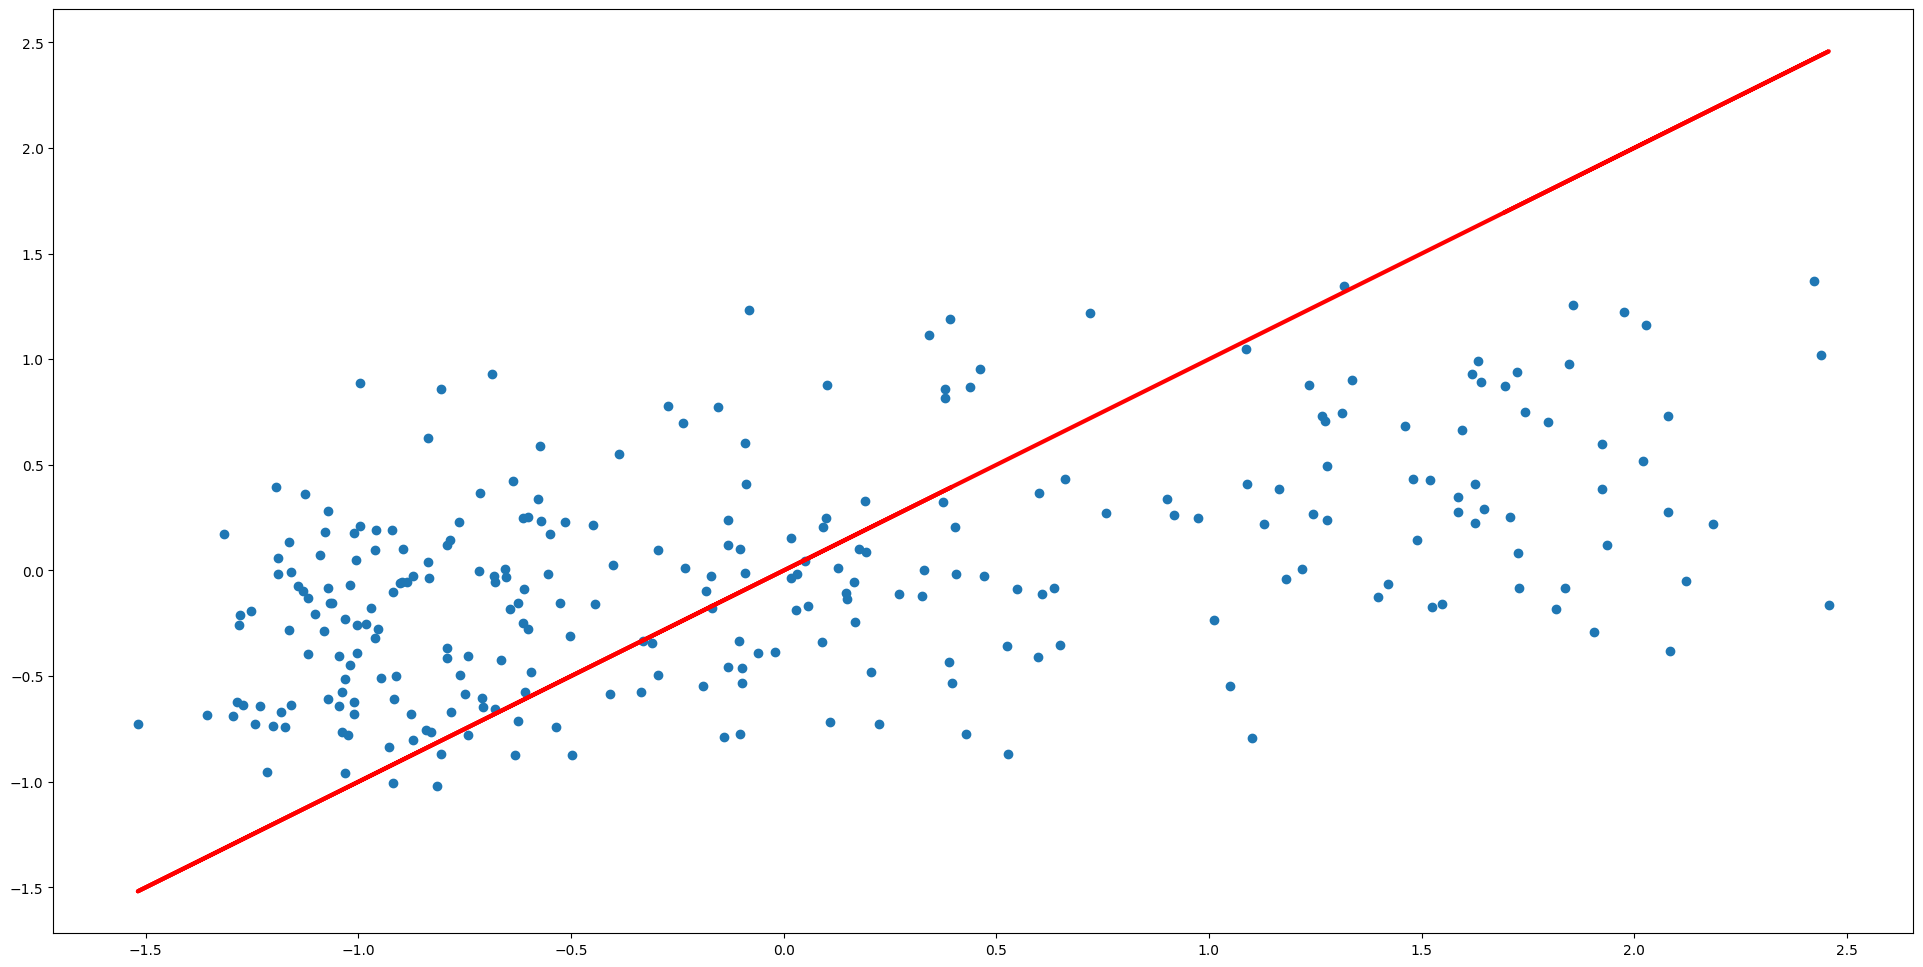

In [239]:
# Create a LinearRegression object
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict the response variable for the testing set
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the regression line
f = plt.figure(figsize=(24, 12))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth = 3)
plt.show()

r2_score (also known as the coefficient of determination) measures the proportion of variance in the response variable that is explained by the predictors in the model. It is defined as 1 minus the ratio of the residual variance to the total variance of the response variable. The r2_score ranges from -1 to 1, with higher values indicating a better fit of the model to the data. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variability in the response variable.

### Making Predictions based on model?